In [36]:
import numpy as np
from numpy.fft import fft, ifft, fft2, ifft2, fftshift
from matplotlib import pyplot as plt

def cross_correlation_using_fft(x, y):
    f1 = fft(x)
    
    f2 = fft(np.flipud(y))
    f2 = fft(y)
    f2 = np.conj(f2)
    
    cc = np.real(ifft(f1 * f2))
    return fftshift(cc)
    
# shift < 0 means that y starts 'shift' time steps before x # shift > 0 means that y starts 'shift' time steps after x
def compute_shift(x, y):
    assert len(x) == len(y)
    c = cross_correlation_using_fft(x, y)
    assert len(c) == len(x)
    print(c)
    print('len : ' + str(len(c)) )
    zero_index = int(len(x) / 2) - 1
    shift = zero_index - np.argmax(c)
    
    print("arg max : " + str(np.argmax(c)))
    print("center : " + str(zero_index))
    print("diff : " + str(shift))
    
    return shift

72488

83456

short : 65430
[ -89808.  -79691. -114470. ...  -54756. -115909. -100727.]
len : 32715
arg max : 10873
center : 16356
diff : 5483
delay : 5483
5483
5483


<ipython-input-37-c627ff58679d>:30: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  data_1 = np.fromstring(data_1, "Int16")
<ipython-input-37-c627ff58679d>:30: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data_1 = np.fromstring(data_1, "Int16")
<ipython-input-37-c627ff58679d>:31: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  data_2 = np.fromstring(data_2, "Int16")
<ipython-input-37-c627ff58679d>:31: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data_2 = np.fromstring(data_2, "Int16")


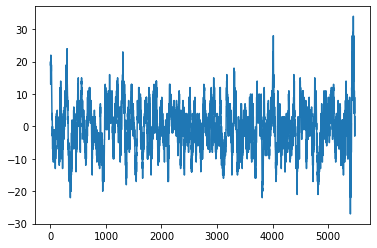

In [37]:
import wave

#target = wave.open('../test_AEC_1.wav','r')
#ref = wave.open('../noise_IU_1ch.wav','r')

target = wave.open('../clap_early.wav','r')
ref = wave.open('../clap.wav','r')


#len_1 = mixed.getnframes()
#len_2 = clean.getnframes()

data_1 = target.readframes(-1)
data_2 = ref.readframes(-1)

display(len(data_1))
display(len(data_2))

short = None
if(len(data_1) > len(data_2) ) : 
    short = len(data_2)
else :
    short = len(data_1)
short = 65430
print('short : ' + str(short))    

data_1 = data_1[:short]
data_2 = data_2[:short]

data_1 = np.fromstring(data_1, "Int16")
data_2 = np.fromstring(data_2, "Int16")

diff = compute_shift(data_1,data_2)
print('delay : ' + str(diff))

data_3 = data_1[-diff:]
data_4 = data_2[:len(data_3)]
print(len(data_3))
print(len(data_4))

plt.plot(data_3-data_4)
plt.show()

In [30]:
xx = [1,2,3,4,5,6]

In [31]:
xx

[1, 2, 3, 4, 5, 6]

In [32]:
fftshift(xx)

array([4, 5, 6, 1, 2, 3])